## Array and String

### Introduction to Array

#### Leetcode 724. Find Pivot Index
* Overview
  + Given an array of integers nums, calculate the pivot index of this array.
  + The pivot index is the index where the sum of all the numbers strictly to the left of the index is equal to the sum of all the numbers strictly to the index's right.
  + If the index is on the left edge of the array, then the left sum is 0 because there are no elements to the left. This also applies to the right edge of the array.
  + Return the leftmost pivot index. If no such index exists, return -1.
* Algorithm
  + linear scan array
  + set left = 0 and right = sum(nums(1:))
  + first check if left == right, return 0
  + for i in range(1, n)
    + left += nums(i-1), right -= nums(i), if left == right, return i
  + return -1 out of for loop
* Time complexity
  + O(N) linear scan of the nums array
* Space complexity
  + O(1) only use left and right variables

In [2]:
from typing import List
class Solution:
    def pivotIndex(self, nums: List[int]) -> int:
        
        n = len(nums)
        left = 0
        right = sum(nums[1:])
        if left == right:
            return 0
        
        for i in range(1, n):
            left += nums[i-1]
            right -= nums[i]
            
            if left == right:
                return i
            
        return -1              

#### Leetcode Largest Number At Least Twice of Others
* Overview
  + You are given an integer array nums where the largest integer is unique.
  + Determine whether the largest element in the array is at least twice as much as every other number in the array. If it is, return the index of the largest element, or return -1 otherwise.
* Algorithm
  + use the template for find the distinct max, max 2 or max 3 elements from a list
  + set index of the max element as -1
  + traverse the nums list
    + if num is one of the max or max second, continue
    + if num > max1, update max2 and max element index
    + elif num > max2, update max2 = num
  + return index if max1 >= 2 max2 else -1
* Time complexity
  + O(N) for linear scanning
* Space complextiy
  + O(1). we only use max1, max2 and index  

In [ ]:
class Solution:
    def dominantIndex(self, nums: List[int]) -> int:
        
        max1, max2 = float("-inf"), float("-inf")
        index = -1
        
        # linear scan the nums array, and find the max
        # and 2nd max elements
        for i, num in enumerate(nums):
            if num == max1 or num == max2:
                continue                
            
            # if num > max1, update max1, max2 and index
            if num > max1:
                max2 = max1
                max1 = num
                index = i
            
            elif num > max2:
                max2 = num
                
        return index if max1 >= 2* max2 else -1         
        

#### Leetcode 66. Plus One
* Overview
  + You are given a large integer represented as an integer array digits, where each digits[i] is the ith digit of the integer. The digits are ordered from most significant to least significant in left-to-right order. The large integer does not contain any leading 0's.
  + Increment the large integer by one and return the resulting array of digits.
* Algorithm
  + linear scanning the digits array from the end to start
  + initialize total = 1, and then for each iteration
    + add the digits(i) to total
    + assign digits(i) = total % 10
    + total //= 10
  + after the for loop
    + if total > 0, digits.insert(0, total)
  + return digits  

In [3]:
class Solution:
    def plusOne(self, digits: List[int]) -> List[int]:
        
        n= len(digits)
        
        # initialize total = 1
        total = 1
        
        for i in range(n-1, -1, -1):
            
            # add total by digits[i]
            # assign total % 10 to digits[i]
            # update total by //10
            total += digits[i]
            digits[i] = total % 10
            total //= 10
            
        # check if there is remaining value in total
        if total > 0:
            digits.insert(0, total)
        return digits    
            

#### Leetcode 498. Diagonal Traverse
* Overview 
  + Given an m x n matrix mat, return an array of all the elements of the array in a diagonal order.
  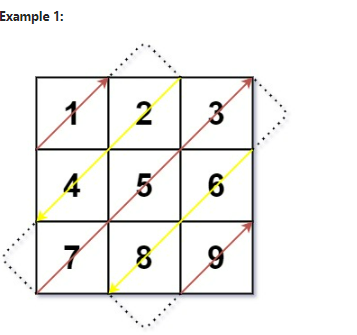
* Algorithm
  + define two moving directions in moves, up-right (-1, 1) and down-left (1, -1)
  + initialize the x, y as 0, 0 and direction of up-right (d = 0)
  + while len(rs < mn)
    + append the current matrix value to rs (rs.append(mat(x, y))
    + check edge cases 
      + principle (see the image of the problem description for clarification)
        + for d ==0 (up left), increment y if possible. othewise, x += 1
        + for d==1 (down right), increment x if possbile. otherwise, y += 1
      + if d == 0, x==0 or y==n-1 (swtich d to 1)        
        + if y < n-1, then x += 1
        + if othewise, y +=  1 
      + if d == 1, x = m-1 or y == 0 (switch d to 0)
        + if y == 0, then x -= 1 ( we shouldn't use x == m-1 since y can still by y-=1)
        + otherwise, y -= 1
      + other than these edge cases, keep on the current direction
        + x += moves(d)(0)
        + y += moves(d)(1)
  + return rs
  
* Time complexity
  + O(mn) where m and n are the numbers of rows and columns
* Space complexity
  + O(mn) to store results in rs list 

#### Leetcode 54. Spiral Matrix
* Overview
  + Given an m x n matrix, return all elements of the matrix in spiral order.
* Algorithm
  + implement according to the spiral travers
  + initialize start and end indices for rows and cols
  + set up the while loop to check if start and end indices are crossed for rows and columns
  + each time after traversing a row and a column, check if there is a cross in row or colum
* Time complexity
  + O(mn) where m, n are the numbers of rows and columns, respectively
* Space complexity
  + O(mn)

In [4]:
from typing import List
class Solution:
    def spiralOrder(self, matrix: List[List[int]]) -> List[int]:
        m, n = len(matrix), len(matrix[0])
        
        start_row = start_col = 0
        end_row = m - 1
        end_col = n - 1
        rs = []
        
        # stop when start_row and end_row indices are crossed
        # or when start_col and end_col indices are crossed
        while start_row <= end_row and start_col <= end_col:
            for j in range(start_col, end_col+1):
                rs.append(matrix[start_row][j])
            start_row += 1
            
            for i in range(start_row, end_row+1):
                rs.append(matrix[i][end_col])
            end_col -= 1
            
            # after traversing one row and one col, check if 
            # the row or col directions are acrossed
            if start_row > end_row or start_col > end_col:
                break
            
            for j in range(end_col, start_col - 1, -1):
                rs.append(matrix[end_row][j])
            end_row -= 1
            
            for i in range(end_row, start_row-1, -1):
                rs.append(matrix[i][start_col])
            start_col += 1
            
        return rs           

#### Leetcode 118. Pascal's Triangle
* Overview
  + Given an integer numRows, return the first numRows of Pascal's triangle.
  + n Pascal's triangle, each number is the sum of the two numbers directly above it as shown:
* Algorithm
  + if numRows == 1, return \[\[1\]\]
  + if numRows > 1, we will iterate numRows -1 times (from 1 to numRows)
    + end index numRows -1, start index 1, altogether numRows-1-1+1 = numRows -1 times
    + each iteration output a triangle
  + j traverse from 1 to i, if i == 1, no loop. If i == 2 (numRows == 3), we have (1, 2, 1)
* Time complexity
  + O(n^2)
* Space complexity
  + O(n^2)
  
    

In [ ]:
class Solution:
    def generate(self, numRows: int) -> List[List[int]]:
        if numRows == 1:
            return [[1]]
        
        pre = [1]
        rs = [[1]]
        
        # the min length of the triangle is two elements
        # starting from i = 1, corresponding to two element triangle
        # when i = 2, we get 3 element
        # so i traverse from 1 to numRows -1, we will have numRows -1 
        # triangles, plus the first triangle, we get numRows triangles
        for i in range(1, numRows):
            tmp = [1]
            for j in range(1, i):
                tmp.append(pre[j-1] + pre[j])
            tmp.append(1)
            pre = tmp
            
            rs.append(pre)
            
        return rs    

### Introduction to String
* string is immutable in Python, which causes the concatenation operation to be O(n^2) due to the copy and paste operations for each iteration

#### Leetcode 67. Add Binary
* Overview
  + Given two binary strings a and b, return their sum as a binary string.
* Algorithm
  + bit by bit implementation
    + linear scan the two strings from the end to start
    + initialize total = 0, if any string has chars at the current index, add it to total (need to convert chars to int)
    + assign the str(total % 2) to the output deque
    + update total //= 2
    + out of the while loop, check if total > 0, if so insert str(total %2) to the deque
    + return "".join(deque)
  + time complexity:
    + O(max(m, n)) 
  + space complexity
    + O(max(m, n))
  + bit-wise implementation
    + convert numbers to binary presentation
    + the current result is x^y
    + the carry is (x & y) << 1
    + while carry > 0, we continue the process of calcuating x^y and (x&y)<< 1
    + output x as string using bin(x)\[2:\]
  + time complexity:
    + O((m+n)) for the bit operations
  + space complexity
    + O(max(m, n) to keep answer

#### Leetcode 28. Find the Index of the First Occurrence in a String
* Overview
  + Given two strings needle and haystack, return the index of the first occurrence of needle in haystack, or -1 if needle is not part of haystack.
* Algorithm (slide window)
  + scan the haystack with a fixed sliding window of width len(needle) and compare if the substring of haystack == needle, if so, return the starting index
  + return -1 out of the for loop of sliding window
* Time complexity
  + O(m
  
  

In [ ]:
class Solution:
    def strStr(self, haystack: str, needle: str) -> int:
        if not haystack and not needle:
            return 0
        
        if not needle:
            return 0
        
        if not haystack:
            return -1
        
        m, n = len(haystack), len(needle)
        
        if m < n:
            return -1
        
        if m == n:
            return 0 if haystack == needle else -1
        
        # apply slide window logic
        for i in range(m-n+1):
            if haystack[i:i+n] == needle:
                return i
        return -1   
        